In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tupak.core.likelihood import GaussianLikelihood
from tupak.core.prior import Uniform
from tupak.core.sampler import run_sampler
from tupak.hyper.likelihood import HyperparameterLikelihood
import h5py
import deepdish
from tupak.core.result import Result
from scipy.stats import gaussian_kde,norm

17:14 tupak INFO    : Running tupak version: 0.2.2: (UNCLEAN) 3b48fec 2018-09-02 21:49:04 +1000


In [2]:
outdir = 'outdir-h'
BHPutils=np.load('BHPutil.npy')
numevents=BHPutils[0]
mu_true=BHPutils[1]
sig_true=BHPutils[2]
#with h5py.File('outdir'+str(0)+'/basic_tutorial'+str(0)+'_result.h5','r') as f:
    #data_group_key = list(f.keys())[3]
    #data0i=f[data_group_key]
    #data = np.asarray(data0i)

results=[]
for i in range(0,numevents):
    filename = 'outdir'+str(i)+'/basic_tutorial'+str(i)+'_result.h5'
    results.append(Result(deepdish.io.load(filename)))
#for i in
#output['run'+str(0)] = deepdish.io.load('outdir'+str(0)+'/basic_tutorial'+str(0)+'_result.h5')



#plt.hist(output['run'+str(0)]['posterior']['mass_1'])
#plt.show()

#print(data)
#print(len(data))


#plt.plot(data)
#plt.ylim(-10000,10000)
#plt.show()

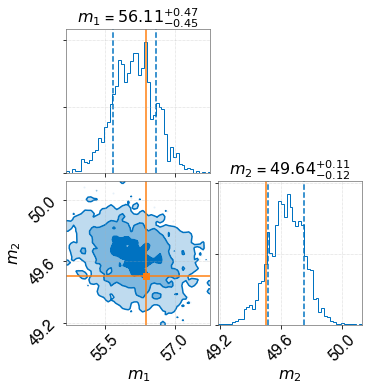

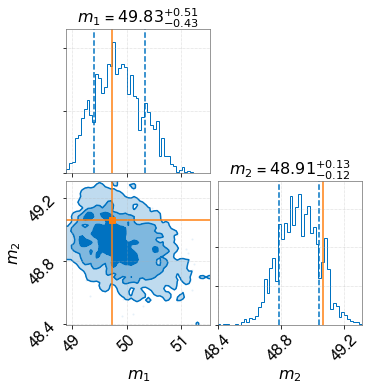

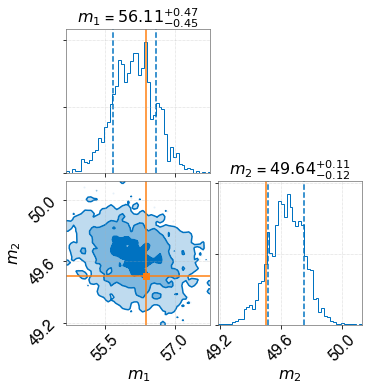

In [3]:
#results[0]
#results[0].plot_corner()
#results[1].plot_corner()

In [4]:
samples = []
for i in range(numevents):
    
    samples.append(results[i].posterior)#.drop('mass_2',axis=1))



/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


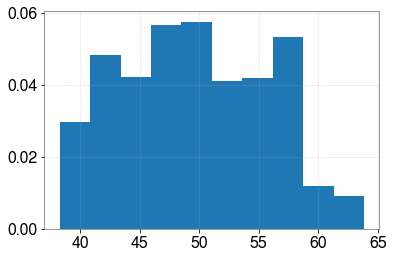

In [76]:
histfullm1=np.hstack([samples[i]['mass_1'] for i in range(numevents)])
histfullm2=np.hstack([samples[i]['mass_2'] for i in range(numevents)])
histfull=np.hstack([histfullm1,histfullm2])
plt.hist(histfull,normed=True)
plt.show()


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


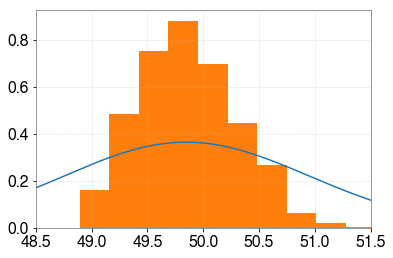

In [34]:
plt.plot(x_grid,kde['run'+str(0)+'_m1'])
plt.hist(samples[0]['mass_1'],normed=True)
plt.xlim(48.5,51.5)
plt.show()

In [81]:
def kde_scipy(x, x_grid, bandwidth=3.0, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method='silverman',**kwargs)
    return kde.evaluate(x_grid)

def kde_scipy_func(x, bandwidth=3.0, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method='scott',**kwargs)
    return kde#evaluate(x_grid)

In [82]:
kde_func_full=kde_scipy_func(histfull)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


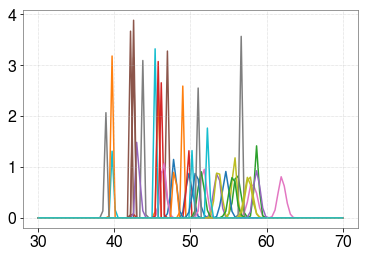

In [68]:
x_grid=np.linspace(30,70,100)
#type(samples[0])
kde={}
kde_func=[]
for i in range(0,numevents):
    #print(np.mean(samples[i]['mass_2']))
    #print(np.std(samples[i]['mass_2']))
    kde['run'+str(i)+'_m1']=kde_scipy(samples[i]['mass_1'],x_grid)
    kde['run'+str(i)+'_m2']=kde_scipy(samples[i]['mass_2'],x_grid)
    kde_func.append(kde_scipy_func(samples[i]['mass_1']))
    kde_func.append(kde_scipy_func(samples[i]['mass_2']))
    
    #print(kde['run'+str(i)])
    plt.plot(x_grid,kde['run'+str(i)+'_m1'])
    plt.plot(x_grid,kde['run'+str(i)+'_m2'])
    ##print(norm.std(kde['run'+str(i)]))
    ##print(np.std(kde['run'+str(i)]))
    print(i)
plt.show()
#print(kde['run1'])

In [69]:
res = lambda x: np.prod([f(x) for f in kde_func])

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


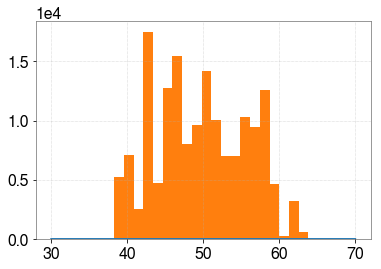

In [86]:
x_grid2=np.linspace(30,70,100)

#plt.plot(x_grid2,[res(x) for x in x_grid2])
plt.plot(x_grid2,kde_func_full(x_grid2))
plt.hist(histfull,normed=False,bins=20)
plt.show()

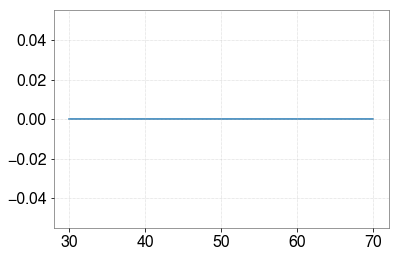

30.0 0.0
0.0


In [71]:
kdef=1.0
for i in range(0,numevents):
    kdef=kde['run'+str(i)+'_m1']*kdef
    kdef=kde['run'+str(i)+'_m2']*kdef

#kdef=kdef
    
plt.plot(x_grid,kdef)
plt.show()

print(x_grid[np.argmax(kdef)],np.std(kdef))
print(max(kdef))

21:30 tupak INFO    : Search parameters:
21:30 tupak INFO    :   mu = Uniform(name='mu', latex_label='$\\mu_{c0}$', minimum=5, maximum=100)
21:30 tupak INFO    :   sigma = Uniform(name='sigma', latex_label='$\\sigma_{c0}$', minimum=0.1, maximum=20)
21:30 tupak INFO    : Single likelihood evaluation took 6.200e-04 s
21:30 tupak INFO    : Using sampler Dynesty with kwargs {'dlogz': 0.1, 'bound': 'multi', 'sample': 'rwalk', 'resume': True, 'walks': 10, 'verbose': True, 'check_point_delta_t': 600, 'nlive': 1000, 'update_interval': 600, 'n_check_point': 1000000}
/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/tupak/hyper/likelihood.py:47: RuntimeWarning: divide by zero encountered in log
  / self.sampling_prior.prob(self.data), axis=-1))) + self.log_factor
 7339| logz=-16.342 +/-    nan | dlogz:  0.000 >  0.100000/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/dynesty/sampler.py:220: RuntimeWarning: invalid value encountered in sqrt
  ('logzerr', np.sqrt(np.array(sel

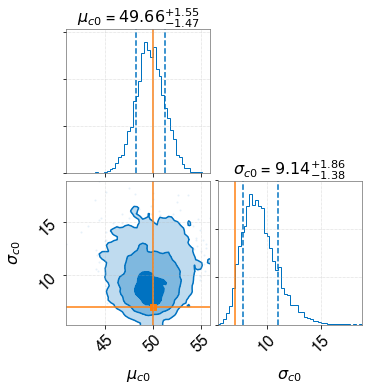

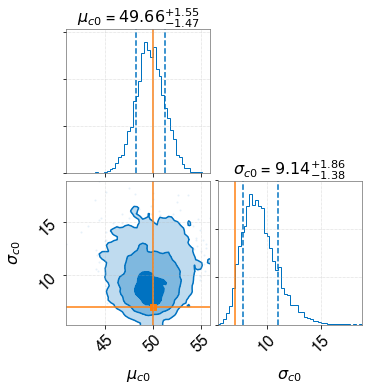

In [72]:
def hyper_prior(data, mu, sigma):
    return np.exp(- ((data['mass_1'] - mu)**2 +(data['mass_2'] - mu)**2 )/ (2 * sigma**2))\
           / (2 * np.pi * sigma**2)**0.5

def run_prior(data):
    return 1 / numevents

#true_mu=50
#true_sigma=7

hp_likelihood = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior,
    sampling_prior=run_prior, max_samples=500)

hp_priors = dict(mu=Uniform(5, 100, 'mu', '$\mu_{c0}$'),
                 sigma=Uniform(.1, 20, 'sigma', '$\sigma_{c0}$'))

# And run sampler
result = run_sampler(
    likelihood=hp_likelihood, priors=hp_priors, sampler='dynesty', nlive=1000,
    outdir=outdir, label='hyper_parameter', verbose=True, clean=True)
result.plot_corner(truth=dict(mu=mu_true, sigma=sig_true))
